In [1]:
import numpy as np

from src import *

from matplotlib import pyplot as plt

Возьмём диапазон частот [600, 2500]

In [2]:
GT_LOW = 600
GT_HIGH = 2_500

In [3]:
signals = []
train_data = []
valid_data = []
test_data = []

count_of_true = 0
count_of_false = 0

# for _ in range(1_000):
while (count_of_true < 500) or (count_of_false < 500):
    signal, features = process_audio_signal(GT_LOW, GT_HIGH)
    if (int(features[-1]) == 0) and (count_of_false < 500):
        count_of_false += 1
        train_data.append(features)
    if (int(features[-1]) == 1) and (count_of_true < 500):
        count_of_true += 1
        train_data.append(features)
    
count_of_true = 0
count_of_false = 0

while (count_of_true < 200) or (count_of_false < 200):
    signal, features = process_audio_signal(GT_LOW, GT_HIGH)
    if (int(features[-1]) == 0) and (count_of_false < 200):
        count_of_false += 1
        valid_data.append(features)
    if (int(features[-1]) == 1) and (count_of_true < 200):
        count_of_true += 1
        valid_data.append(features)
    
count_of_true = 0
count_of_false = 0

while (count_of_true < 200) or (count_of_false < 200):
    signal, features = process_audio_signal(GT_LOW, GT_HIGH)
    if (int(features[-1]) == 0) and (count_of_false < 200):
        count_of_false += 1
        test_data.append(features)
    if (int(features[-1]) == 1) and (count_of_true < 200):
        count_of_true += 1
        test_data.append(features)

train_data = np.array(train_data)
valid_data = np.array(valid_data)
test_data = np.array(test_data)

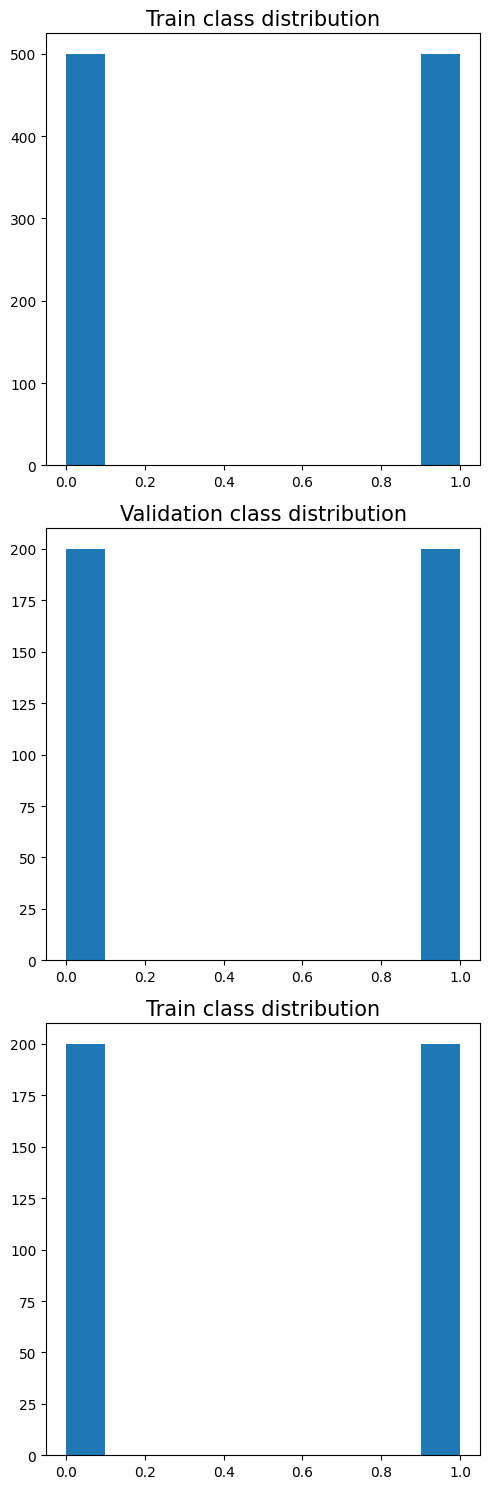

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 15))

axes[0].hist(train_data[..., -1])
axes[0].set_title("Train class distribution", fontsize=15)

axes[1].hist(valid_data[..., -1])
axes[1].set_title("Validation class distribution", fontsize=15)

axes[2].hist(test_data[..., -1])
axes[2].set_title("Train class distribution", fontsize=15)

fig.tight_layout();

In [5]:
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
import torch

model = FrequenciesDetector()
optimizer = Adam(model.parameters(), lr=1e-5)
criterion = CrossEntropyLoss()

model, train_loss_list, val_loss_list, train_acc_list, val_acc_list =  train_model(model, torch.Tensor(train_data), torch.Tensor(valid_data), criterion, optimizer, 40, 32)

Training model:   2%|▎         | 1/40 [00:00<00:12,  3.06it/s]

Epoch 0: train loss: 213.712, train acc: 0.50, test loss: 182.894, test acc: 0.50, lr: 1e-05


Training model:  28%|██▊       | 11/40 [00:02<00:06,  4.80it/s]

Epoch 10: train loss: 0.347, train acc: 0.75, test loss: 0.293, test acc: 0.76, lr: 1e-05


Training model:  52%|█████▎    | 21/40 [00:04<00:04,  4.74it/s]

Epoch 20: train loss: 0.341, train acc: 0.75, test loss: 0.264, test acc: 0.77, lr: 1e-05


Training model:  78%|███████▊  | 31/40 [00:06<00:01,  4.54it/s]

Epoch 30: train loss: 0.428, train acc: 0.72, test loss: 0.241, test acc: 0.77, lr: 1e-05


Training model: 100%|██████████| 40/40 [00:08<00:00,  4.63it/s]


In [6]:
test_model(model, torch.Tensor(test_data))

Accuracy: 0.76
F1 Score: 0.7828054298642534
Recall: 0.865
Precision: 0.7148760330578512
Balanced Accuracy: 0.76


array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

Text(0.5, 0, 'Epoch')

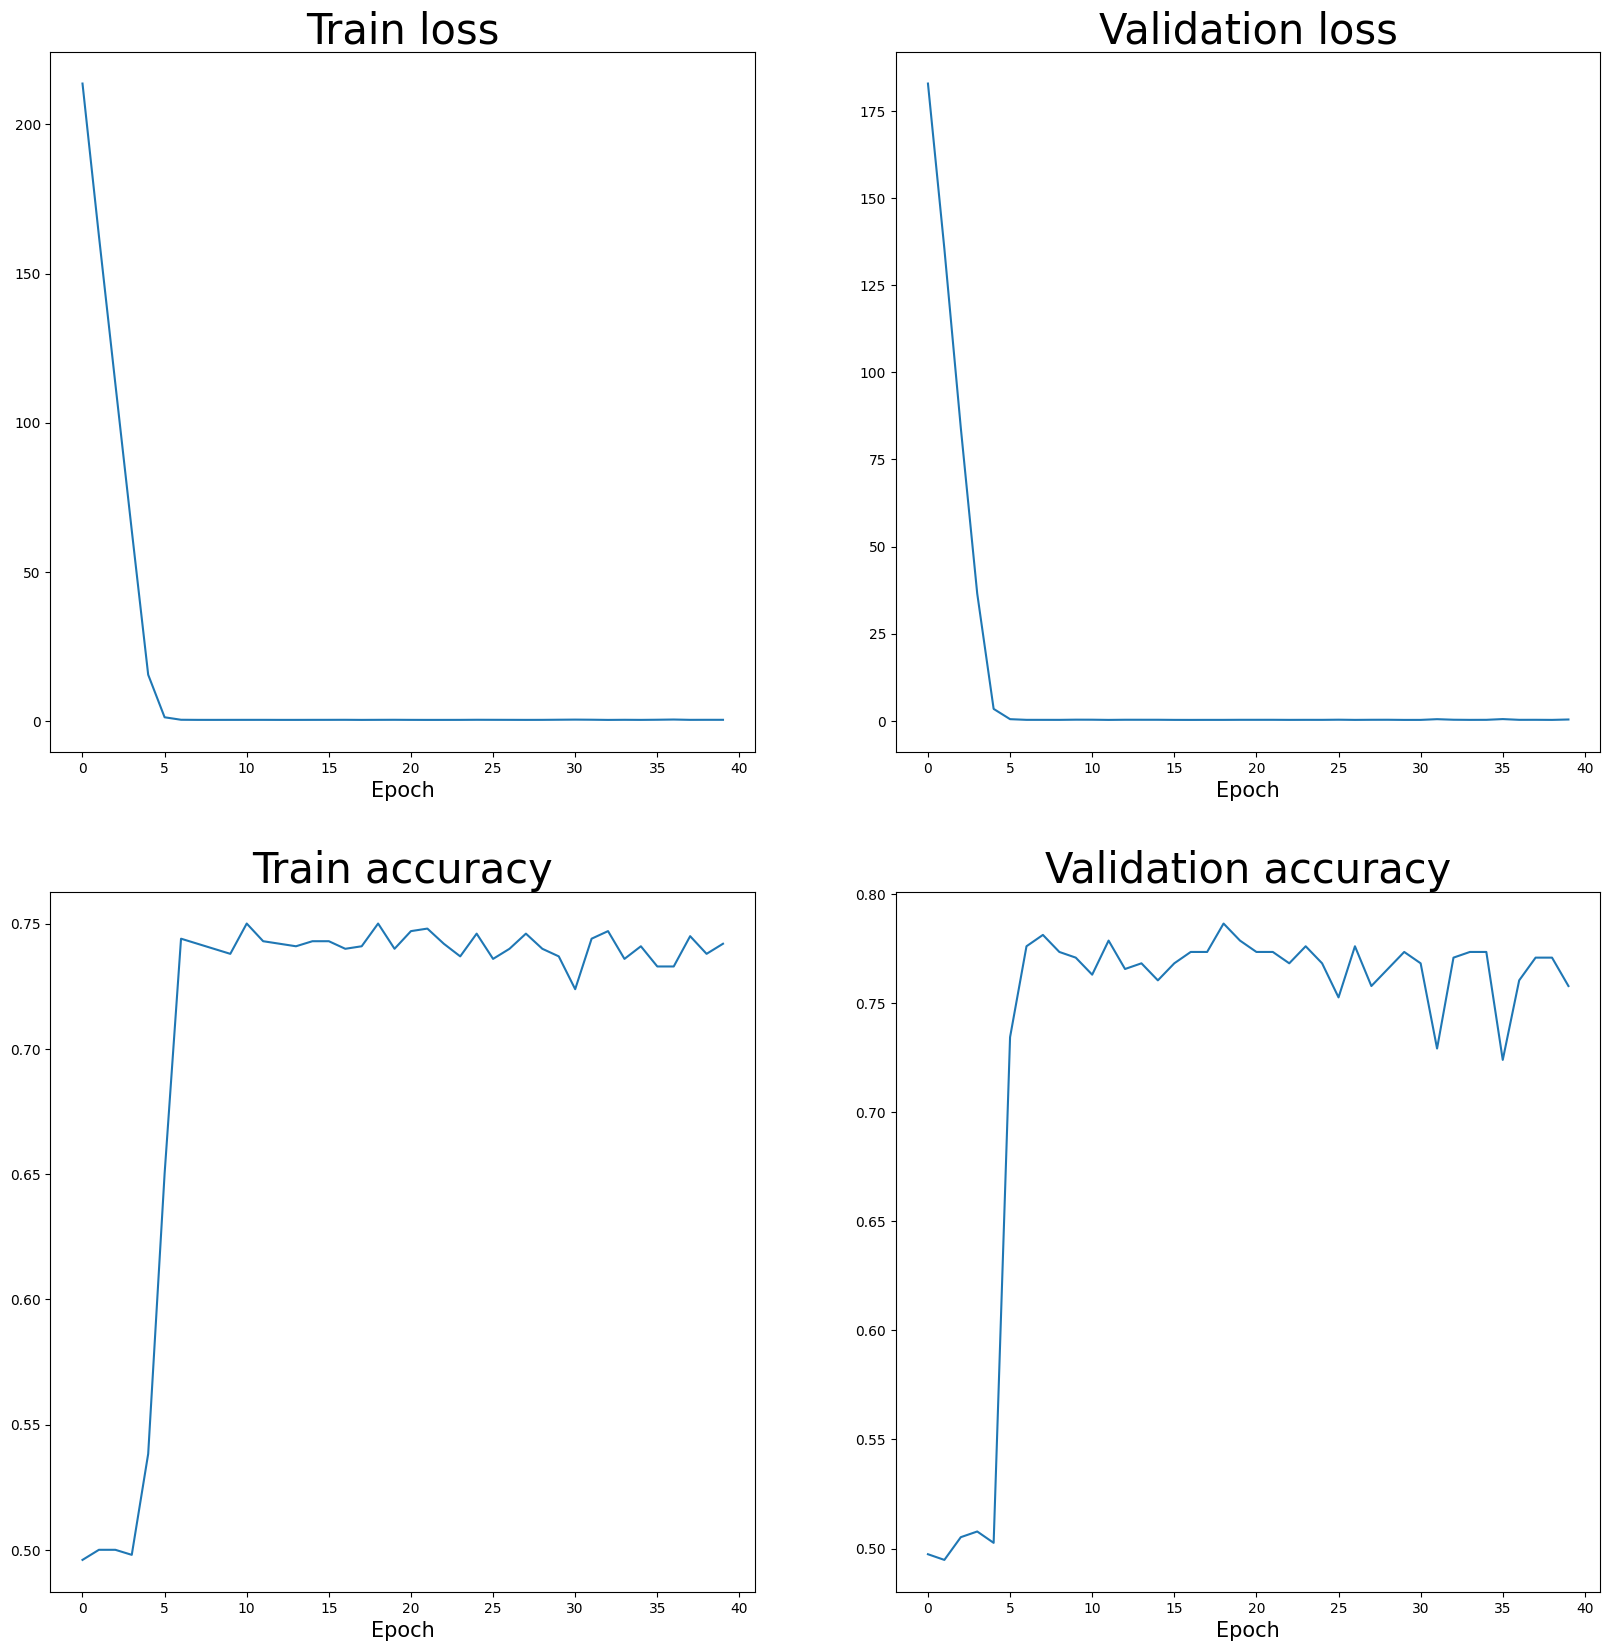

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

axes[0][0].plot(train_loss_list)
axes[0][0].set_title("Train loss", fontsize=30)
axes[0][0].set_xlabel("Epoch", fontsize=15)

axes[0][1].plot(val_loss_list)
axes[0][1].set_title("Validation loss", fontsize=30)
axes[0][1].set_xlabel("Epoch", fontsize=15)

axes[1][0].plot(train_acc_list)
axes[1][0].set_title("Train accuracy", fontsize=30)
axes[1][0].set_xlabel("Epoch", fontsize=15)

axes[1][1].plot(val_acc_list)
axes[1][1].set_title("Validation accuracy", fontsize=30)
axes[1][1].set_xlabel("Epoch", fontsize=15)

Отчёт:
* Модель неплохо обучилась, хотя в ней было всего 3 полносвязных слоя и на вход подаётся только 2 фичи. ```Accuracy = 0.76``` и ```F1-score = 0.78```
* Лосс убывает стабильно.
* Видно, что на 10-ой эпохе качество значительно улучшилось, дальше модель не особо хорошо выучивала закономерности (судя по слабо убывающему лоссу).
* Модель хорошо обучилась, т.к. были грамотно подобраны фичи. Spectral centroid, если посмотреть на формулу, то это взвешенное среднее частот, и Spectral Bandwidth, отклонение от центроида на значения сигнала. Т.е. фичи могут дать нам представление о том, какие частоты были в сигнале.
* В целом, чтобы улучшить результат, возможно, потребуется взять ещё какие-нибудь характеристики сигнала, т.к. вряд-ли усложнение сети (не такие сложные данные) и увеличение размера датасета(кажется, 1000 записей вполне достаточно) даст существенный прирост.